In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from numpy.ma.core import correlate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
data=pd.read_csv('./info/Escanteios BD.xlsx - Planilha1.csv')
data.head()

,Item,Placar casa,Placar Fora,Ataques Casa,Ataques Fora,Diff Ataques,Ataques Perigosos Casa,Ataques Perigosos Fora,Dif Ataq Perig,Posse de Bola Casa,...,Escanteios Casa,Escanteios Fora,Total Escanteios,Chutes No Alvo casa,Chutes No alvo Fora,Total Chutes bi Alvo,Tempo,Minuto Ultimo Escanteio,Minuto do Ultimo Gol,Escanteio Final
0,1,0,0,46,59,-13,14,25,-11,36,...,0,2,2,0,3,3,1,26,0,N
1,2,1,0,55,62,-7,22,25,-3,46,...,1,3,4,1,1,2,1,38,25,N
2,3,0,2,57,38,19,23,13,10,61,...,5,1,6,1,3,4,1,38,32,S
3,4,0,0,64,37,27,19,11,8,65,...,3,0,3,0,1,1,1,35,0,S
4,5,2,1,66,35,31,16,20,-4,57,...,0,2,2,4,2,6,1,13,47,S


In [3]:
cpy_dataSet = data.drop(columns='Item ')

In [4]:
cpy_dataSet.columns

Index(['Placar casa', 'Placar Fora', 'Ataques Casa', 'Ataques Fora',
       'Diff Ataques', 'Ataques Perigosos Casa ', 'Ataques Perigosos Fora ',
       'Dif Ataq Perig', 'Posse de Bola Casa ', 'Posse de Bola Fora',
       'Dif Posse de Bola', 'Escanteios Casa ', 'Escanteios Fora',
       'Total Escanteios ', 'Chutes No Alvo casa', 'Chutes No alvo Fora',
       'Total Chutes bi Alvo', 'Tempo', 'Minuto Ultimo Escanteio',
       'Minuto do Ultimo Gol', 'Escanteio Final '],
      dtype='object')

In [28]:
cpy_dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Placar casa              174 non-null    int64 
 1   Placar Fora              174 non-null    int64 
 2   Ataques Casa             174 non-null    int64 
 3   Ataques Fora             174 non-null    int64 
 4   Diff Ataques             174 non-null    int64 
 5   Ataques Perigosos Casa   174 non-null    int64 
 6   Ataques Perigosos Fora   174 non-null    int64 
 7   Dif Ataq Perig           174 non-null    int64 
 8   Posse de Bola Casa       174 non-null    int64 
 9   Posse de Bola Fora       174 non-null    int64 
 10  Dif Posse de Bola        174 non-null    int64 
 11  Escanteios Casa          174 non-null    int64 
 12  Escanteios Fora          174 non-null    int64 
 13  Total Escanteios         174 non-null    int64 
 14  Chutes No Alvo casa      174 non-null    i

In [30]:
#Modificando a coluna Escanteio final
escanteio_final = cpy_dataSet['Escanteio Final '].values
aux_values = []
for n in escanteio_final:
    if n == 'S':
        aux_values.append(True)
    else:
        aux_values.append(False)
        
cpy_dataSet['escanteio_final'] = np.array(aux_values)

cpy_dataSet.head()

,Placar casa,Placar Fora,Ataques Casa,Ataques Fora,Diff Ataques,Ataques Perigosos Casa,Ataques Perigosos Fora,Dif Ataq Perig,Posse de Bola Casa,Posse de Bola Fora,...,Escanteios Fora,Total Escanteios,Chutes No Alvo casa,Chutes No alvo Fora,Total Chutes bi Alvo,Tempo,Minuto Ultimo Escanteio,Minuto do Ultimo Gol,Escanteio Final,escanteio_final
0,0,0,46,59,-13,14,25,-11,36,64,...,2,2,0,3,3,1,26,0,N,False
1,1,0,55,62,-7,22,25,-3,46,54,...,3,4,1,1,2,1,38,25,N,False
2,0,2,57,38,19,23,13,10,61,39,...,1,6,1,3,4,1,38,32,S,True
3,0,0,64,37,27,19,11,8,65,35,...,0,3,0,1,1,1,35,0,S,True
4,2,1,66,35,31,16,20,-4,57,43,...,2,2,4,2,6,1,13,47,S,True


In [32]:
cpy_dataSet.drop(columns='Escanteio Final ', inplace=True)

KeyError: "['Escanteio Final '] not found in axis"

In [33]:
cpy_dataSet.head()

,Placar casa,Placar Fora,Ataques Casa,Ataques Fora,Diff Ataques,Ataques Perigosos Casa,Ataques Perigosos Fora,Dif Ataq Perig,Posse de Bola Casa,Posse de Bola Fora,...,Escanteios Casa,Escanteios Fora,Total Escanteios,Chutes No Alvo casa,Chutes No alvo Fora,Total Chutes bi Alvo,Tempo,Minuto Ultimo Escanteio,Minuto do Ultimo Gol,escanteio_final
0,0,0,46,59,-13,14,25,-11,36,64,...,0,2,2,0,3,3,1,26,0,False
1,1,0,55,62,-7,22,25,-3,46,54,...,1,3,4,1,1,2,1,38,25,False
2,0,2,57,38,19,23,13,10,61,39,...,5,1,6,1,3,4,1,38,32,True
3,0,0,64,37,27,19,11,8,65,35,...,3,0,3,0,1,1,1,35,0,True
4,2,1,66,35,31,16,20,-4,57,43,...,0,2,2,4,2,6,1,13,47,True


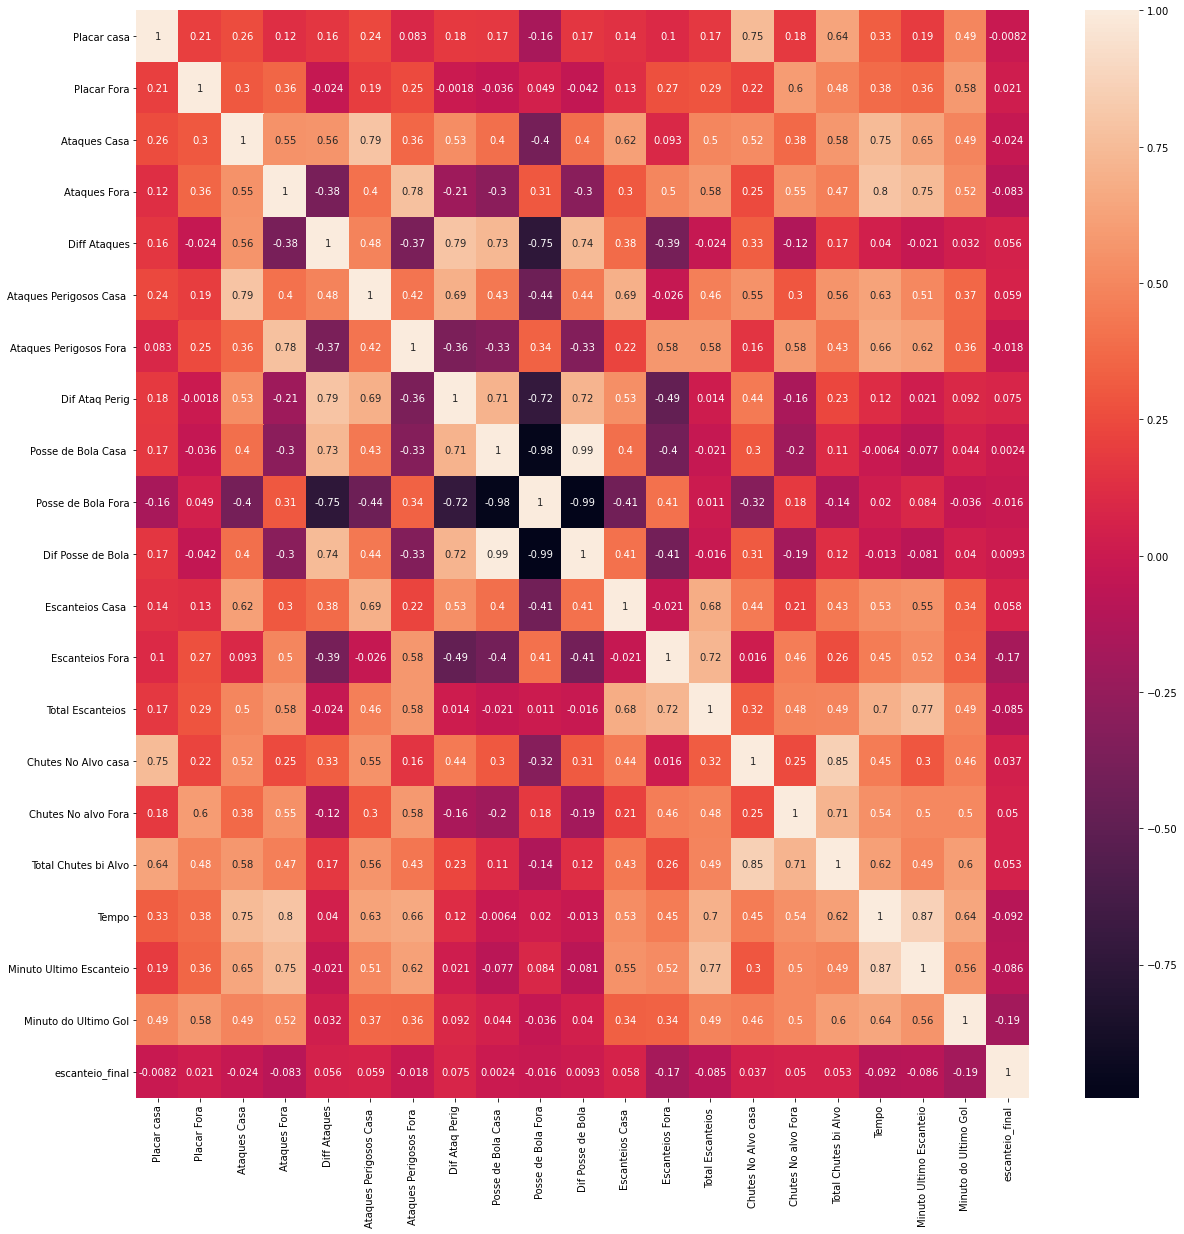

In [34]:
#Imprimindo a matriz de correlação entre as variáveis
correlation_m = cpy_dataSet.corr(method='pearson')
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_m, annot=True)
plt.show()

In [35]:
#Normalizandos os dados através do método min-max
X = cpy_dataSet.drop(columns='escanteio_final')
#X = newdf.drop(columns=['target', 'corners_home', 'corners_away'])
Y = cpy_dataSet['escanteio_final']

In [36]:
for column in X.columns:
    X[column] = X[column]  /  X[column].abs().max()
    
X_1 = X.values
Y_1 = Y.values

X.head()

,Placar casa,Placar Fora,Ataques Casa,Ataques Fora,Diff Ataques,Ataques Perigosos Casa,Ataques Perigosos Fora,Dif Ataq Perig,Posse de Bola Casa,Posse de Bola Fora,Dif Posse de Bola,Escanteios Casa,Escanteios Fora,Total Escanteios,Chutes No Alvo casa,Chutes No alvo Fora,Total Chutes bi Alvo,Tempo,Minuto Ultimo Escanteio,Minuto do Ultimo Gol
0,0.000000,0.00,0.254144,0.385621,-0.126214,0.125000,0.271739,-0.144737,0.467532,0.820513,-0.500000,0.000000,0.1250,0.1250,0.0000,0.333333,0.15,0.5,0.295455,0.000000
1,0.142857,0.00,0.303867,0.405229,-0.067961,0.196429,0.271739,-0.039474,0.597403,0.692308,-0.142857,0.071429,0.1875,0.2500,0.0625,0.111111,0.10,0.5,0.431818,0.271739
2,0.000000,0.50,0.314917,0.248366,0.184466,0.205357,0.141304,0.131579,0.792208,0.500000,0.392857,0.357143,0.0625,0.3750,0.0625,0.333333,0.20,0.5,0.431818,0.347826
3,0.000000,0.00,0.353591,0.241830,0.262136,0.169643,0.119565,0.105263,0.844156,0.448718,0.535714,0.214286,0.0000,0.1875,0.0000,0.111111,0.05,0.5,0.397727,0.000000
4,0.285714,0.25,0.364641,0.228758,0.300971,0.142857,0.217391,-0.052632,0.740260,0.551282,0.250000,0.000000,0.1250,0.1250,0.2500,0.222222,0.30,0.5,0.147727,0.510870


In [37]:
# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_1, Y_1, test_size = 0.2, random_state=10)

In [38]:
svc = SVC(random_state=10)
# defining parameter range for svm
param_grid = {'C': [0.1, 1, 10,],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# define random search for SVM
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats=10, random_state=10)
search = RandomizedSearchCV(svc, param_grid, n_iter=20, scoring='precision', n_jobs=4, cv=cv, random_state=10)

In [39]:
# execute search
result_svc = search.fit(X_train, y_train)

# summarize result for SVM
print('=========Random Search Results for SVM==========')
print('Best Score: %s' % result_svc.best_score_)
print('Best Hyperparameters: %s' % result_svc.best_params_)

=========Random Search Results for SVM==========
Best Score: 0.639771652006778
Best Hyperparameters: {'kernel': 'linear', 'gamma': 0.01, 'C': 10}


In [40]:
# IMprimindo o classification report
modelo = result_svc.best_estimator_
print (classification_report(y_test, modelo.predict(X_test)))

print (confusion_matrix(y_test, modelo.predict(X_test)))

              precision    recall  f1-score   support

       False       0.73      0.61      0.67        18
        True       0.65      0.76      0.70        17

    accuracy                           0.69        35
   macro avg       0.69      0.69      0.68        35
weighted avg       0.69      0.69      0.68        35

[[11  7]
 [ 4 13]]
